In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
import random
import pandas as pd
import proposal as pp

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14

def calculate_energy(p):
    return np.sqrt(p * p + pp.particle.MuMinusDef().mass**2)

In [96]:
from EcoMug.build import EcoMug

gen = EcoMug.EcoMug_Class()
gen.SetUseSky()  # plane surface generation
gen.SetSkySize((10, 10))  # x and y size of the plane
gen.SetSkyCenterPosition((0, 0, 20))  # (x,y,z) position of the center of the plane
gen.SetSeed(1909)
# gen.SetMinimumMomentum(10)  # in GeV
# gen.SetMaximumMomentum(1)  # in GeV

In [101]:
# %%time
STATISTICS = int(1e6)
muon_position = []
muon_p = []
muon_theta = []
muon_phi = []
muon_charge = []

for event in tqdm(range(STATISTICS), disable=False):
    gen.Generate()

    muon_position.append(gen.GetGenerationPosition())
    muon_p.append(gen.GetGenerationMomentum())
    muon_theta.append(gen.GetGenerationTheta())
    muon_phi.append(gen.GetGenerationPhi())
    muon_charge.append(gen.GetCharge())

df = pd.DataFrame()
df['position'] = muon_position
df['momentum'] = muon_p
muon_e = []
for i in range(len(muon_p)):
    muon_e.append(calculate_energy(muon_p[i]*1e3)/1e3)
df['energy'] = muon_e
df['theta'] = muon_theta
df['phi'] = muon_phi
df['charge'] = muon_charge

100%|██████████| 1000000/1000000 [00:12<00:00, 78648.73it/s]


In [ ]:
data = df['energy']
bins = np.geomspace(min(data), max(data), 200)
plt.xscale('log')
plt.xlabel(r'$E \,/\, \mathrm{GeV} $')
plt.ylabel("Frequency")
_ = plt.hist(data, bins=bins, log=True) 

AttributeError: 'Line2D' object has no property 'log'

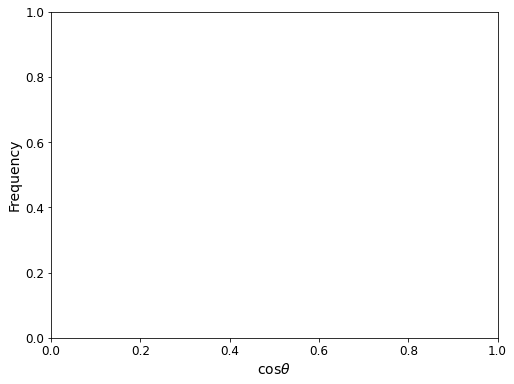

In [108]:
data = df['energy']
x = np.cos(df['theta'])
# bins = np.geomspace(min(data), max(data), 200)
# x = np.linspace(len(data))
# plt.xscale('log')
plt.xlabel(r'$\mathrm{cos} \theta $')
plt.ylabel("Frequency")
_ = plt.plot(x, y, log=True) 